In [1]:
### Put your NAME and EID here:smt2868 Sean Tremblay 

# Problem Set 03b

Make sure you have the following packages installed for Python3:

- scikit-learn
- numpy
- matplotlib

In [2]:
# imports needed
import numpy as np
import matplotlib.pyplot as plt

# setting seed, DON'T modify
np.random.seed(10)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

## Problem 1: Classifying Boston Dataset

### Part A.

In this homework, you will be getting hands on experience on training your own linear classifiers. To do this will be working with the [Boston dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). 

Luckily, scikit-learn has this dataset available to use. This part will have you setup their dataset to be used for classification:

- First, download the boston dataset from **scikit-learn**.
    - They should have a module that allows you to download it directly: [load_boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)
    - After calling **load_boston()**, it should return a dictionary-like object that contains information.
    - The data itself is found in the **.data** item in the dictionary.
    
- Notice that .data has shape **(506,13)**. It does not have any given labels, but we will create our own synthetic labels.
    - Extract the first column from this matrix (i.e. index 0). 
    - Calculate the median of this column.
    
- Now we will assign our own **y** based on the following:
    - Assign a class of **0** to each sample (row) if the first column is **less than** the above median.
    - Assign **1** otherwise (i.e. it has a value **greater than or equal to** the median).
    
- Finally, we will define our dataset:
    - **X**: all data samples using every feature **EXCEPT** for the first column. 
        - This should have shape (506,12)
    - **y**: created from the previous step.

Useful modules:
    - sklearn.datasets.load_boston
    - np.median


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
# setting seed, DON'T modify
import sklearn.cross_validation
np.random.seed(10)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

# part a

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
print(bos.head())
bos.columns = boston.feature_names
#bos['PRICE'] = boston.target
medianCol1 = bos['CRIM'].median()
price = bos['CRIM']

price[price >= medianCol1] = 1
price[price < medianCol1] = 0

#X = bos.drop('PRICE', axis = 1)
X = bos.drop('CRIM', axis = 1)
Y = price


(506, 13)
        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


c:\users\sean\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Part B.

Now we will train two separate classifiers for this task -- Logistic Regression and Linear Discriminant Analysis, using scikit-learn.

- As usual, divide X,y into separate training/testing sets.
    - Use the **first 400 samples** as **Xtrain, ytrain**
    - Use the **next 106 samples** as **Xtest, ytest**
    
- Now create a logistic regression model using scikit-learn, and train it on the **training set**.
    - This will be similar to the previous homework, but using their logistic regression module.
    - Only use the default parameters (i.e. don't pass any extra parameters to the scikit-learn module)
    - Measure the following **prediction error** i.e. (1-accuracy) on the **test set**.
    
- Now create an LDA model using scikit-learn, and repeat the steps above.

- For ease of grading, please create a **bar chart** that shows the error of both the LogisticRegression and LDA models. 
    - Make sure to label each bar accordingly and include a legend.

Useful modules:
    - sklearn.linear_model.LogisticRegression
    - sklearn.discriminant_analysis.LinearDiscriminantAnalysis
    - plt.bar
    - plt.legend


(400, 12)
(106, 12)
(400,)
(106,)


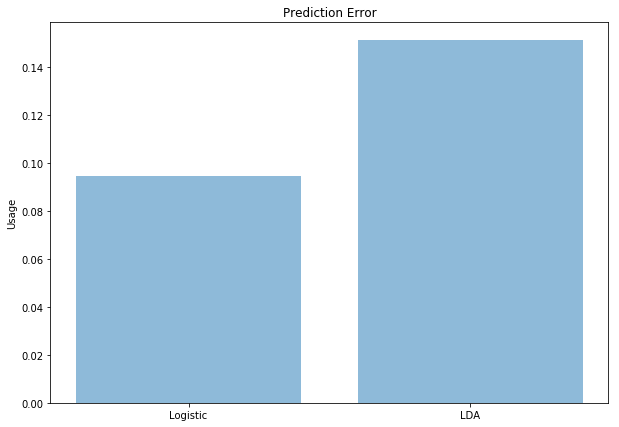

In [4]:
split = 400/506
split2 = 106/506

X_train = X.iloc[:400, :]
X_test = X.iloc[400:, :]

Y_train = Y.iloc[:400]
Y_test = Y.iloc[400:]

#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = split2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf = LogisticRegression(random_state=11)
clf2 = clf.fit(X_train, Y_train)
Y_predicted_acc = clf2.score(X_test, Y_test)

pred_err = 1 - Y_predicted_acc


# LDA

from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train2 = sc.fit_transform(X_train)
#X_test2 = sc.transform(X_test)

clf_LDA = LinearDiscriminantAnalysis(n_components=1)
clf_LDA2 = clf_LDA.fit(X_train, Y_train)
#X_test2 = clf_LDA.transform(X_test2)

LDA_acc = clf_LDA2.score(X_test, Y_test)

pred_err_LDA = 1 - LDA_acc

# GRAPHS
objects = ('Logistic', 'LDA')
y_pos = np.arange(len(objects))
performance = [pred_err, pred_err_LDA]
plt.figure(0)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Prediction Error')


### Part C.

For this last section, we will be running an experiment that measures the effect of the # of training samples vs. the test set error. 

**Note:** In this section, make sure to keep your **test set constant**, and only do the following operations on the **train set**.

Let our possible $n = [100,200,300,400]$. For **BOTH** LogisticRegression and LDA, and for each $n$, do the following:

- Take a random sample from the training set of size $n$. Assign these to new variables, do not overwrite the original training set.

- Now train your model using this smaller random sample. 

- Collect the **test prediction error**. 

- Now, repeat the above steps **10 times**. Find the mean for these prediction error samples, and the standard deviation.

Once you have collected the mean prediction error and standard deviations for each $n$ and for each model you will now visualize:

- Create a bar plot with the **x-axis** as $n$ and the **y-axis** mean test prediction error.

- This bar plot should contain the following:
    - Two bars for each $n$, one for LogisticRegression, the other LDA. Make them different colors.
    - In addition add in **error bars** based on your computed standard deviations.
    - Include a legend, and axis titles.

Useful modules:
    - sklearn.linear_model.LogisticRegression
    - sklearn.discriminant_analysis.LinearDiscriminantAnalysis
    - np.std
    - np.mean
    - plt.bar
    - plt.legend


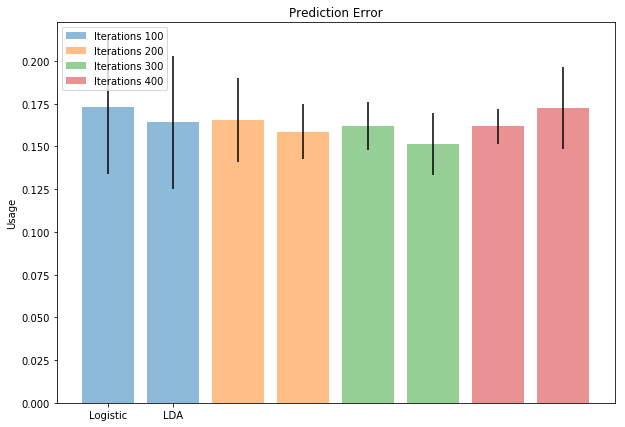

In [5]:
# PART C

n = [100,200,300,400]

pred_error_sample_log_n = []
pred_error_sample_lda_n = []
colors= ['b', 'g','r','c','m', 'y', 'k']
i =0
plt.figure(2)
for n_value in n:
    pred_error_sample_log = []
    pred_error_sample_lda = []
    for j in range(0,10):
        split2 = n_value/506
        X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size=split2,random_state=j*10)
        #X_train_sample = X_train.sample(n = n_value)
        clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
        clf2 = clf.fit(X_train, Y_train)
        Y_predicted_acc = clf.score(X_test, Y_test)

        pred_err3 = 1 - Y_predicted_acc

        pred_error_sample_log.append(pred_err3)

        # LDA

        #sc = StandardScaler()
        #X_train2 = sc.fit_transform(X_train)
        #X_test2 = sc.transform(X_test)

        clf_LDA = LinearDiscriminantAnalysis(n_components=1)
        clf_LDA.fit_transform(X_train, Y_train)
        # X_test2 = clf_LDA.transform(X_test2)

        LDA_acc = clf_LDA.score(X_test, Y_test)

        pred_err_LDA2 = 1 - LDA_acc

        pred_error_sample_lda.append(pred_err_LDA2)
    log1 = np.asarray(pred_error_sample_log)
    lda1 = np.asarray(pred_error_sample_lda)

    mean1 = log1.mean()
    mean2= lda1.mean()

    std1 = log1.std()
    std2 = lda1.std()

    objects = ('Logistic', 'LDA')
    y_pos = np.arange(len(objects))

    performance  = [mean1, mean2]
    performance_deviation = [std1, std2]



    plt.bar(y_pos + (i*2), performance, yerr = performance_deviation,align='center', alpha=0.5, label="Iterations %d" % n_value)
    plt.xticks(y_pos, objects)
    plt.ylabel('Usage')
    plt.title('Prediction Error')

    i = i +1

plt.legend(loc='upper left')

i = i +1

## Turn in Instructions

Once you have completed Problems 1 and 2, please submit (for this part of the assignment):

- This .ipynb file.
- A PDF version of this file. To do this:
    1. Go to File -> Download as -> HTML
    2. Open the HTML and Print, and change the **destination** to **PDF**.